In [80]:
import os
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from dateutil.relativedelta import relativedelta
warnings.simplefilter('ignore')

# 環境設定

In [53]:
DATA_PATH = "../data"

# 分析

## データ読み込み

In [315]:
train_data = pd.read_csv(os.path.join(DATA_PATH, "train.csv"), index_col=0)
test_data = pd.read_csv(os.path.join(DATA_PATH, "test.csv"), index_col=0)

## 前処理

In [316]:
dollar_amount_cols = ["DisbursementGross", "GrAppv", "SBA_Appv"]
for col in dollar_amount_cols:
    train_data[col] = train_data[col].apply(lambda x: x.replace("$", "").replace(".", "").replace(",", "")).astype(int).copy()
    test_data[col] = test_data[col].apply(lambda x: x.replace("$", "").replace(".", "").replace(",", "")).astype(int).copy()

## 各カラムの確認

### nullのあるカラム

In [22]:
train_data.isnull().sum(axis=0)

Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
RevLineCr            1079
LowDoc                531
DisbursementDate      150
MIS_Status              0
Sector                  0
ApprovalDate            0
ApprovalFY              0
City                    0
State                   0
BankState              11
DisbursementGross       0
GrAppv                  0
SBA_Appv                0
UrbanRural              0
dtype: int64

In [331]:
test_data.isnull().sum(axis=0)

Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
RevLineCr            1041
LowDoc                520
DisbursementDate      160
Sector                  0
ApprovalDate            0
ApprovalFY              0
City                    0
State                   0
BankState              16
DisbursementGross       0
GrAppv                  0
SBA_Appv                0
UrbanRural              0
train_or_test           0
dtype: int64

### 表記揺れカラム

In [27]:
# RevLineCr: リボルビング信用枠か
print('train')
display(train_data["RevLineCr"].value_counts())
print('test')
display(test_data["RevLineCr"].value_counts())

train


N    27618
Y     7353
0     5561
T      696
Name: RevLineCr, dtype: int64

test


N    27829
Y     7454
0     5346
T      638
Name: RevLineCr, dtype: int64

In [28]:
# LowDoc: 15万ドル未満のローンの1ページの短い申請で処理できるプログラムか
print('train')
display(train_data["LowDoc"].value_counts())
print('test')
display(test_data["LowDoc"].value_counts())

train


N    34313
Y     5277
0      684
A      570
S      540
C      392
Name: LowDoc, dtype: int64

test


N    34360
Y     5275
0      675
A      561
S      523
C      394
Name: LowDoc, dtype: int64

In [33]:
print('train')
display(train_data[pd.to_datetime(train_data["ApprovalDate"]) >= pd.to_datetime("2024-03-01")])
print('test')
display(test_data[pd.to_datetime(test_data["ApprovalDate"]) >= pd.to_datetime("2024-03-01")])

train


,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,MIS_Status,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural
1417,238,22,1.0,0,0,0,N,N,26-Mar-10,1,62,17-Oct-73,1974,MILPITAS,CA,DC,44550000,44550000,33412500,0
8682,84,17,1.0,0,0,0,N,N,5-Oct-88,1,44,17-Oct-73,1974,SONORA,CA,CA,18000000,18000000,18000000,0
18156,83,49,1.0,0,0,0,N,N,12-Feb-88,1,62,17-Oct-73,1974,JACKSON HEIGHTS,NY,SD,6700000,5000000,2500000,0
28238,240,48,1.0,9,0,0,N,N,31-Dec-07,1,72,17-Oct-73,1974,DASSEL,MN,SD,37820000,37820000,28365000,0


test


,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural
49650,303,24,1.0,0,0,0,N,N,28-Feb-05,62,17-Oct-73,1974,CLAREMORE,OK,OK,94050000,94050000,70537500,0
71059,83,21,1.0,0,0,0,N,N,31-Jan-01,42,17-Oct-73,1974,BOCA RATON,FL,FL,7834800,5000000,2500000,0
78536,239,42,1.0,1,0,0,N,N,28-Feb-05,44,17-Oct-73,1974,FAIRHAVEN,MA,RI,6718400,5000000,2500000,0


In [34]:
print('train')
display(train_data[pd.to_datetime(train_data["ApprovalDate"], format="%d-%b-%y") >= pd.to_datetime("2024-03-01")])
print('test')
display(test_data[pd.to_datetime(test_data["ApprovalDate"], format="%d-%b-%y") >= pd.to_datetime("2024-03-01")])

train


,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,MIS_Status,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural


test


,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural


### 年月等

In [64]:
# 前処理
train_data["ApprovalDate"] = pd.to_datetime(train_data["ApprovalDate"], format="%d-%b-%y")
train_data["DisbursementDate"] = pd.to_datetime(train_data["DisbursementDate"], format="%d-%b-%y")
test_data["ApprovalDate"] = pd.to_datetime(test_data["ApprovalDate"], format="%d-%b-%y")
test_data["DisbursementDate"] = pd.to_datetime(test_data["DisbursementDate"], format="%d-%b-%y")

In [65]:
train_data["WatingTime"] = train_data["DisbursementDate"] - train_data["ApprovalDate"]
test_data["WatingTime"] = test_data["DisbursementDate"] - test_data["ApprovalDate"]

In [66]:
cols=["ApprovalDate", "DisbursementDate"]
display(train_data[cols].describe(include="all"))
display(test_data[cols].describe(include="all"))

,ApprovalDate,DisbursementDate
count,42307,42157
unique,3868,916
top,2003-10-07 00:00:00,2003-11-30 00:00:00
freq,1347,1634
first,1973-10-17 00:00:00,1973-12-06 00:00:00
last,2014-01-13 00:00:00,2014-07-05 00:00:00


,ApprovalDate,DisbursementDate
count,42308,42148
unique,3888,915
top,2003-10-07 00:00:00,2003-11-30 00:00:00
freq,1372,1627
first,1973-10-17 00:00:00,1973-12-06 00:00:00
last,2014-01-13 00:00:00,2014-07-05 00:00:00


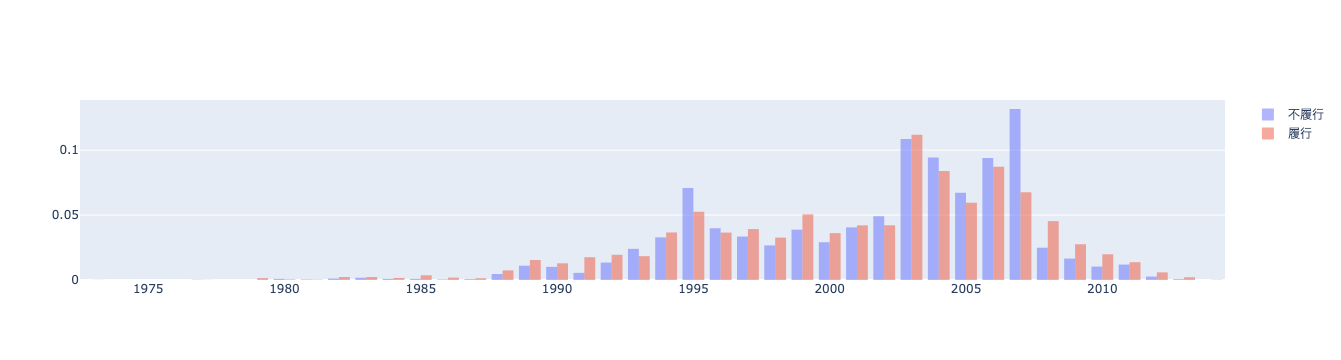

In [68]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=train_data[train_data["MIS_Status"]==0]["ApprovalDate"].apply(lambda x: x.year), histnorm='probability', opacity=0.5, name="不履行"))
fig.add_trace(go.Histogram(x=train_data[train_data["MIS_Status"]==1]["ApprovalDate"].apply(lambda x: x.year), histnorm='probability', opacity=0.5, name="履行"))
fig.show()

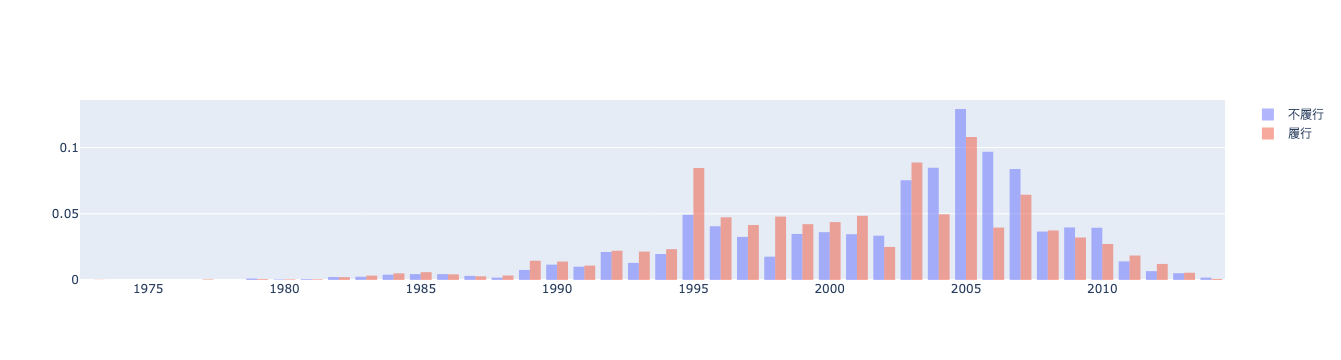

In [69]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=train_data[train_data["MIS_Status"]==0]["DisbursementDate"].apply(lambda x: x.year), histnorm='probability', opacity=0.5, name="不履行"))
fig.add_trace(go.Histogram(x=train_data[train_data["MIS_Status"]==1]["DisbursementDate"].apply(lambda x: x.year), histnorm='probability', opacity=0.5, name="履行"))
fig.show()

In [50]:
cols = ["WatingTime"]
display(train_data[cols].describe(include="all"))
display(test_data[cols].describe(include="all"))

,WatingTime
count,42157
mean,-72 days +01:21:50.558151671
std,3103 days 20:36:13.473957312
min,-12152 days +00:00:00
25%,-2167 days +00:00:00
50%,-123 days +00:00:00
75%,2046 days 00:00:00
max,13309 days 00:00:00


,WatingTime
count,42148
mean,-84 days +19:06:31.192939167
std,3110 days 12:51:07.796482592
min,-12452 days +00:00:00
25%,-2151 days +18:00:00
50%,-118 days +00:00:00
75%,2062 days 00:00:00
max,12250 days 00:00:00


### 融資期間とリーマンショックが被るか

In [79]:
print('train')
display(train_data["Term"].describe())
print('test')
display(test_data["Term"].describe())

train


count    42307.000000
mean       108.601673
std         84.569847
min          0.000000
25%         56.000000
50%         82.000000
75%        168.000000
max        360.000000
Name: Term, dtype: float64

test


count    42308.000000
mean       108.515222
std         84.894703
min          0.000000
25%         56.000000
50%         82.000000
75%        168.000000
max        360.000000
Name: Term, dtype: float64

In [88]:
# 返済完了予定日のカラムを追加
train_data["DisbursementDate"] = train_data["DisbursementDate"].fillna(max(train_data["DisbursementDate"]) + relativedelta(days=1))
test_data["DisbursementDate"] = test_data["DisbursementDate"].fillna(max(test_data["DisbursementDate"]) + relativedelta(days=1))
train_data["RepaymentDate"] = train_data.apply(lambda row: row["DisbursementDate"] + relativedelta(years=row["Term"]//12, months=row["Term"]%12), axis=1)
test_data["RepaymentDate"] = test_data.apply(lambda row: row["DisbursementDate"] + relativedelta(years=row["Term"]//12, months=row["Term"]%12), axis=1)

In [103]:
# 承認日がリーマンショック前か
shock_date = pd.to_datetime("2008-09-15")
train_data["approve_before_Lehmanshock"] = train_data["ApprovalDate"] < shock_date
test_data["approve_before_Lehmanshock"] = test_data["ApprovalDate"] < shock_date

In [104]:
df = train_data.groupby(["approve_before_Lehmanshock", "MIS_Status"]).size().reset_index().rename(columns={0: "cnt"})
df["ratio"] = df.groupby("approve_before_Lehmanshock")["cnt"].apply(lambda x: x / x.sum())
df

,approve_before_Lehmanshock,MIS_Status,cnt,ratio
0,False,0,219,0.065766
1,False,1,3111,0.934234
2,True,0,4321,0.110860
3,True,1,34656,0.889140


In [91]:
# リーマンショックを含むかどうか
shock_date = pd.to_datetime("2008-09-15")
train_data["is_Lehmanshock"] = (train_data["DisbursementDate"] < shock_date) & (train_data["RepaymentDate"] > shock_date)
test_data["is_Lehmanshock"] = (test_data["DisbursementDate"] < shock_date) & (test_data["RepaymentDate"] > shock_date)

In [102]:
df = train_data.groupby(["is_Lehmanshock", "MIS_Status"]).size().reset_index().rename(columns={0: "cnt"})
df["ratio"] = df.groupby("is_Lehmanshock")["cnt"].apply(lambda x: x / x.sum())
df

,is_Lehmanshock,MIS_Status,cnt,ratio
0,False,0,2593,0.115475
1,False,1,19862,0.884525
2,True,0,1947,0.098076
3,True,1,17905,0.901924


In [101]:
df.groupby("is_Lehmanshock")["cnt"].apply(lambda x: x / x.sum())

0    0.115475
1    0.884525
2    0.098076
3    0.901924
Name: cnt, dtype: float64

### 外部データ

In [112]:
df = pd.read_csv(os.path.join(DATA_PATH, "federal_funds_effective_rate.csv"))
df["DATE"] = pd.to_datetime(df["DATE"])

In [113]:
train_data["DATE"] = train_data["DisbursementDate"].apply(lambda x: x + relativedelta(day=1))
train_data = pd.merge(train_data, df, on="DATE", how="left").rename(columns={"FEDFUNDS": "Disbursement_Fedfunds"})
train_data = train_data.drop(columns="DATE")

In [115]:
train_data["DATE"] = train_data["ApprovalDate"].apply(lambda x: x + relativedelta(day=1))
train_data = pd.merge(train_data, df, on="DATE", how="left").rename(columns={"FEDFUNDS": "Approval_Fedfunds"})
train_data = train_data.drop(columns="DATE")

不履行平均： 3.5479691629955945
履行平均： 3.869224190430799


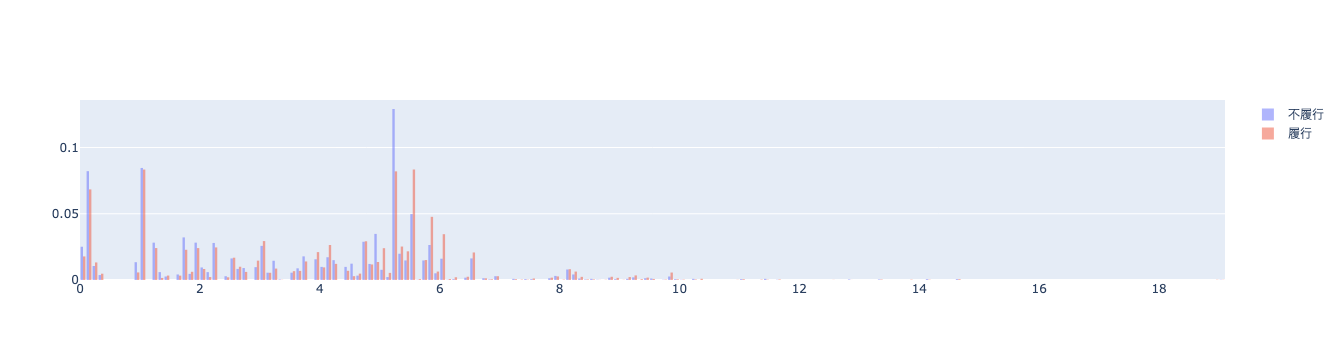

In [118]:
fig = go.Figure()
mean_0 = train_data[train_data["MIS_Status"]==0]["Disbursement_Fedfunds"].mean()
mean_1 = train_data[train_data["MIS_Status"]==1]["Disbursement_Fedfunds"].mean()
print(f"不履行平均： {mean_0}")
print(f"履行平均： {mean_1}")
fig.add_trace(go.Histogram(x=train_data[train_data["MIS_Status"]==0]["Disbursement_Fedfunds"], histnorm='probability', opacity=0.5, name="不履行"))
fig.add_trace(go.Histogram(x=train_data[train_data["MIS_Status"]==1]["Disbursement_Fedfunds"], histnorm='probability', opacity=0.5, name="履行"))
fig.show()

不履行平均： 3.8425550660792953
履行平均： 3.7775160854714436


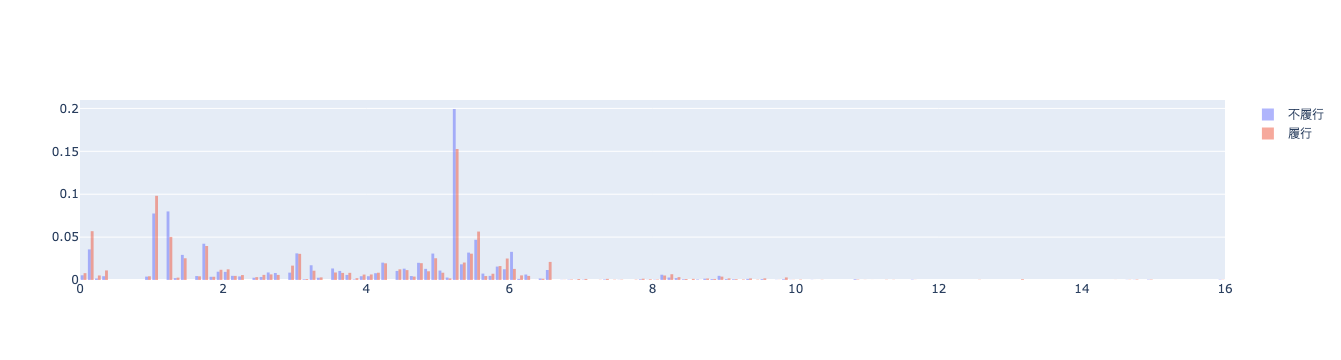

In [119]:
fig = go.Figure()
mean_0 = train_data[train_data["MIS_Status"]==0]["Approval_Fedfunds"].mean()
mean_1 = train_data[train_data["MIS_Status"]==1]["Approval_Fedfunds"].mean()
print(f"不履行平均： {mean_0}")
print(f"履行平均： {mean_1}")
fig.add_trace(go.Histogram(x=train_data[train_data["MIS_Status"]==0]["Approval_Fedfunds"], histnorm='probability', opacity=0.5, name="不履行"))
fig.add_trace(go.Histogram(x=train_data[train_data["MIS_Status"]==1]["Approval_Fedfunds"], histnorm='probability', opacity=0.5, name="履行"))
fig.show()

### City

In [317]:
print(f'trainデータのCityユニーク数{train_data["State"].nunique()}')
print(f'testデータのCityユニーク数{test_data["State"].nunique()}')

trainデータのCityユニーク数51
testデータのCityユニーク数51


In [318]:
print(f'trainデータのCityユニーク数{train_data["City"].nunique()}')
print(f'testデータのCityユニーク数{test_data["City"].nunique()}')
print(f'trainデータとtestデータのCity一致数：{len(set(train_data["City"]) & set(test_data["City"]))}')
print(f'trainデータのみに含まれる：{len(set(train_data["City"]) - set(test_data["City"]))}')
print(f'testデータのみに含まれる：{len(set(test_data["City"]) - set(train_data["City"]))}')
# >>> より一致させられたら精度上がるのでは？（trainだけ，testだけに含まれるデータは無駄になっているので）

trainデータのCityユニーク数2703
testデータのCityユニーク数2678
trainデータとtestデータのCity一致数：2170
trainデータのみに含まれる：533
testデータのみに含まれる：508


In [319]:
train_data["City"] = train_data["City"].apply(lambda x: x.upper())
test_data["City"] = test_data["City"].apply(lambda x: x.upper())

In [320]:
# 対称差集合
rare_cities = list(set(train_data["City"]).symmetric_difference(set(test_data["City"])))
train_data["train_or_test"] = "train"
test_data["train_or_test"] = "test"
cols = ["State", "City", "train_or_test"]
train_test = pd.concat([train_data[cols], test_data[cols]])

In [321]:
print(train_test["City"].nunique())
# print(train_test["City"].apply(lambda x: x.upper()).nunique())
# print(train_test["City"].apply(lambda x: x.upper()).replace(" ", "").nunique())
print(train_test["City"].apply(lambda x: x.upper().split("(")[0].replace(" ", "")).nunique())

2954
2886


In [322]:
def rename_city(x):
    x = x.upper()
    x = x.split("(")[0]
    x = x.replace(" ", "")
    return x

In [323]:
train_test[train_test["City"].isin(rare_cities)]["City"].value_counts().head(20)

WOONSOCKET         8
CHINO HILLS        8
LATHAM             7
CUBA CITY          7
CHOTEAU            7
CORNING            6
MABLETON           6
UNION GAP          6
WENTZVILLE         6
SAGINAW            6
PAULDEN            5
JOSHUA             5
CENTRAL FALLS      5
BRANCHBURG         5
WEBSTER CITY       5
OCEAN SHORE        5
CLYDE              5
PICAYUNE           5
NORTH KINGSTOWN    5
PORT CHARLOTTE     5
Name: City, dtype: int64

In [324]:
print(f'testデータのみに含まれる：{len(set(test_data["City"]) - set(train_data["City"]))}')

testデータのみに含まれる：452


In [311]:
df = train_data.groupby(["State", "City"]).size().reset_index().rename(columns={0: "count"})
idx = df.groupby("State").idxmax().values.flatten()

In [351]:
df[df["State"] == "CO"]

,State,City,count
412,CO,ALAMOSA,1
413,CO,ARVADA,12
414,CO,AURORA,27
415,CO,BAILEY,6
416,CO,BOULDER,19
417,CO,BRECKENRIDGE,8
418,CO,BRIGHTON,16
419,CO,BROOMFIELD,1
420,CO,BURLINGTON,1
421,CO,CASTLE ROCK,4


In [335]:
new_test_data = test_data.copy()

In [336]:
rename_dict = dict(zip(df.iloc[idx]["State"].tolist(), df.iloc[idx]["City"].tolist()))
new_test_data["City"] = new_test_data["City"].where(new_test_data["City"].isin(set(train_data["City"])), new_test_data["State"].map(rename_dict))

In [337]:
print(f'testデータのみに含まれる：{len(set(new_test_data["City"]) - set(train_data["City"]))}')

testデータのみに含まれる：0


In [339]:
test_data[~test_data["City"].isin(set(train_data["City"]))]

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural,train_or_test
42340,240,55,1.0,0,0,0,N,N,12-Apr-06,0,8-Dec-94,1995,CRAIG,CO,CO,4500000,4500000,3150000,0,test
42355,84,47,1.0,0,0,0,N,N,3-Sep-85,42,12-Oct-90,1991,ZION GROVE,PA,PA,30400000,31400000,23550000,0,test
42400,43,51,1.0,0,0,0,N,N,31-May-08,62,29-Sep-80,1980,WENTZVILLE,MO,OH,118100000,122000000,122000000,0,test
42456,40,13,1.0,7,0,0,N,N,31-Aug-02,42,7-Jul-95,1995,CONVERSE,TX,TX,12000000,13300000,11305000,1,test
42543,242,6,1.0,0,0,0,N,N,12-Oct-05,53,29-Apr-05,2005,ELK CITY,OK,TX,7123600,5000000,2500000,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84278,238,16,1.0,4,90,0,N,N,31-Aug-05,72,8-Apr-98,1998,LINCOLNWOOD,IL,IL,16711500,7500000,3750000,0,test
84323,68,48,1.0,0,0,0,N,N,31-Oct-91,42,24-Feb-10,2010,ALGONQUIN,IL,IL,35000000,64800000,48600000,0,test
84387,46,18,1.0,0,7,0,N,N,31-Jan-89,72,18-Sep-98,1998,UNION GAP,WA,OH,4150000,4150000,3320000,1,test
84444,299,45,1.0,4,0,0,N,N,30-Apr-89,42,21-Jan-98,1998,HAMLIN,NY,NJ,28699500,29000000,21750000,1,test


In [347]:
new_test_data.loc[42340]

Term                       240
NoEmp                       55
NewExist                   1.0
CreateJob                    0
RetainedJob                  0
FranchiseCode                0
RevLineCr                    N
LowDoc                       N
DisbursementDate     12-Apr-06
Sector                       0
ApprovalDate          8-Dec-94
ApprovalFY                1995
City                    DENVER
State                       CO
BankState                   CO
DisbursementGross      4500000
GrAppv                 4500000
SBA_Appv               3150000
UrbanRural                   0
train_or_test             test
Name: 42340, dtype: object

In [280]:
test_data[test_data["City"].isin(rare_cities)][["State", "City"]]

,State,City
42340,CO,CRAIG
42355,PA,ZION GROVE
42400,MO,WENTZVILLE
42456,TX,CONVERSE
42532,TX,Odessa
...,...,...
84323,IL,ALGONQUIN
84336,KY,Union
84387,WA,UNION GAP
84444,NY,HAMLIN
